# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
%matplotlib inline

In [3]:
n_sample, n_feature = X.shape
n_neighbors = 30
est_rate = [('50_rate', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=20., early_exaggeration=12.)),
            ('100_rate', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=100., early_exaggeration=12.)),
            ('200_rate', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)),
            ('400_rate', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=400., early_exaggeration=12.))]
est_exaggerate = [('5_exag', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=200., early_exaggeration=5.)),
                  ('12_exag', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)),
                  ('20_exag', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=200., early_exaggeration=20.)),
                  ('30_exag', manifold.TSNE(n_components = 2, random_state=0, init='pca', learning_rate=200., early_exaggeration=30.))]

In [4]:
def plot_embedding(X, title = None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color = plt.cm.Set1(y[i] / 10.), fontdict = {'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

t_SNE with different learning_rate
Time elapsed: 10.786
Time elapsed: 10.694
Time elapsed: 10.815
Time elapsed: 11.206


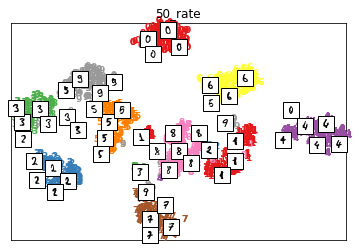

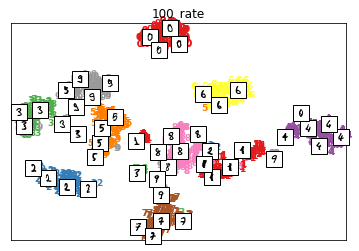

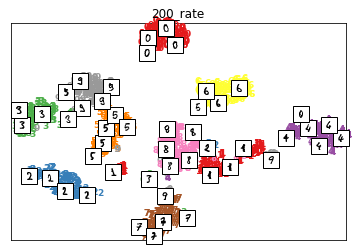

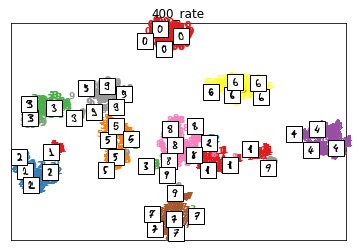

In [5]:
import time

print('t_SNE with different learning_rate')
for name, est in est_rate: 
    t0 = time.time()
    tsne = est.fit_transform(X)
    plot_embedding(tsne, title = name)
    t1 = time.time() 
    print("Time elapsed: %.3f" % (t1 - t0))

t_SNE with different early_exaggeration
Time elapsed: 11.163
Time elapsed: 11.215
Time elapsed: 11.507
Time elapsed: 12.150


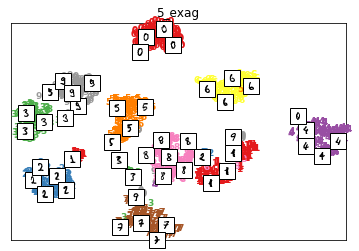

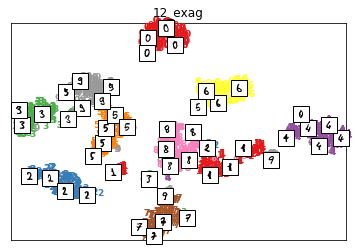

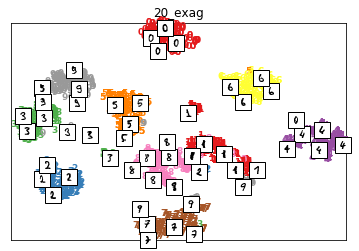

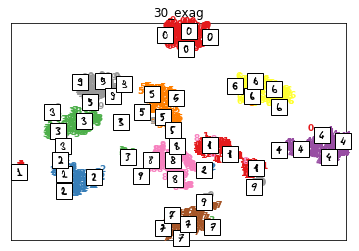

In [6]:
print('t_SNE with different early_exaggeration')
for name, est in est_exaggerate: 
    t0 = time.time()
    tsne = est.fit_transform(X)
    plot_embedding(tsne, title = name)
    t1 = time.time() 
    print("Time elapsed: %.3f" % (t1 - t0))